# EDA

# Project Title: Disease Outbreak Analysis (Covid-19)


# Domain: Medical Science ⚕

# Data source: Johns Hopkins,WHO (Github)


# About the dataset:
1. **FIPS:** The Federal Information Processing Standard code. It's a unique numeric code assigned to each geographic region (such as county or state in the US)
2. **Admin2**: The secondary administrative division, typically represents the county or district within a state or province.
3. **Province_State:** The primary administrative division, like a province, or territory within a country.
4. **Country_Region:** The country or region where the data was recorded.
5. **Last_Update:** Timestamp of the last update.
6. **Lat:** Latitude.
7. **Long_:** Longitude.
8. **Confirmed:** Total number of confirmed COVID-19 cases.
9. **Deaths:** Total number of deaths.
10. **Recovered:** Total number of recoverie.
11. **Active:** Current active COVID-19 cases.
12. **Combined_Key:** (Country,State)
13. **Incident_Rate:** The number of confirmed cases per 100,000 people in the population.
14. **Case_Fatality_Ratio:** The percentage of confirmed cases that resulted in death.


1. Load the Dataset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/01-01-2021.csv")

2. Columns and rows no. in dataset

In [3]:
print("Raws:",df.shape[0])
print("Columns:",df.shape[1])

Raws: 4011
Columns: 14


3. Check the info...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


4. Drop unnecessary columns...

In [5]:
df.drop(columns=["FIPS","Admin2"],inplace=True)

In [6]:
df.shape

(4011, 12)

In [11]:
df.sample(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
2761,Ohio,US,2021-01-02 05:22:33,39.751072,-82.630882,10031,130,0,9901,"Fairfield, Ohio, US",6365.897927,1.295982
3287,Tennessee,US,2021-01-02 05:22:33,36.524548,-86.873467,6865,75,0,6459,"Robertson, Tennessee, US",9097.238662,1.132711
3569,Utah,US,2021-01-02 05:22:33,37.627630,-109.803371,1406,32,0,1374,"San Juan, Utah, US",9184.740005,2.275960
1474,Iowa,US,2021-01-02 05:22:33,43.081776,-93.261224,4353,62,0,4291,"Cerro Gordo, Iowa, US",10254.416961,1.424305
3755,Washington,US,2021-01-02 05:22:33,47.038928,-122.140596,25864,348,0,25516,"Pierce, Washington, US",2857.963712,1.345500


5. Check Description

In [8]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3922.000000,3922.000000,4.011000e+03,4011.000000,4.011000e+03,4.011000e+03,3922.000000,3963.000000
mean,35.768908,-71.113714,2.102613e+04,476.518823,1.180731e+04,9.259591e+03,5738.940929,2.228699
std,13.391261,55.220345,1.055172e+05,2833.090464,8.193885e+04,5.719777e+04,3227.374130,17.174874
min,-71.949900,-175.198200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,33.202974,-96.580090,7.010000e+02,9.000000,0.000000e+00,5.780000e+02,3536.967442,0.969239
50%,37.910342,-86.708116,1.968000e+03,31.000000,0.000000e+00,1.657000e+03,5840.344304,1.551567
75%,42.181730,-77.358102,7.693500e+03,112.000000,0.000000e+00,4.915500e+03,7752.568815,2.341350
max,71.706900,178.065000,2.636045e+06,81593.000000,2.114760e+06,2.400750e+06,27388.219766,1026.206897


In [9]:
# Check the null values count...
df.isnull().sum()

,0
Province_State,178
Country_Region,0
Last_Update,0
Lat,89
Long_,89
Confirmed,0
Deaths,0
Recovered,0
Active,0
Combined_Key,0


Check the duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

Handling Missing Values

In Province_State

In [12]:
# In Province_State
df["Province_State"] = df["Province_State"].fillna(
    df["Combined_Key"].str.split(',').str[1].str.strip()
)

In [15]:
df["Province_State"].isnull().sum()
# So we have still the null values it means here is no Province_state values in Combined_Key column....

np.int64(176)

Now we are using ffill and bfill...

In [19]:
df["Province_State"] = df["Province_State"].fillna(method='ffill').fillna(method='bfill')

In [20]:
df["Province_State"].isna().sum()

np.int64(0)

In Lat column...

In [21]:
# In Lat column...
df['Lat'] = df.groupby(['Province_State', 'Country_Region'])['Lat'].transform(lambda x: x.fillna(method='ffill'))

In Long_ column..

In [22]:
# In Long_ column....
df['Long_'] = df.groupby(['Province_State', 'Country_Region'])['Long_'].transform(lambda x: x.fillna(method='bfill'))

In Incident_Rate

In [23]:
# In Incident_Rate column...
# Calculate the median...
med_value= df["Incident_Rate"].median()
med_value

5840.344303930313

In [24]:
df["Incident_Rate"] = df["Incident_Rate"].fillna(med_value)

In [25]:
df["Incident_Rate"].isnull().sum()

np.int64(0)

In Case_fatality_ratio

case_fatality_ratio = Death / confirmed * 100

Check the zero values in the columns

In [26]:
zero_confir = df[df["Confirmed"]==0]

In [27]:
zero_confir.shape[0]

55

In [28]:
df = df[df["Confirmed"] != 0]   # Taking only those raws in which confirmed not equal to 0.

In [29]:
missing_values = df["Case_Fatality_Ratio"].isnull()
df.loc[missing_values, "Case_Fatality_Ratio"] = (df.loc[missing_values, "Deaths"] / df.loc[missing_values, "Confirmed"]) * 100

In [30]:
df.isnull().sum()

,0
Province_State,0
Country_Region,0
Last_Update,0
Lat,13
Long_,16
Confirmed,0
Deaths,0
Recovered,0
Active,0
Combined_Key,0


In [31]:
df["Lat"] =df["Lat"].fillna(method='ffill')

In [32]:
df["Long_"] = df["Long_"].fillna(method='ffill')

In [33]:
df.isnull().sum()

,0
Province_State,0
Country_Region,0
Last_Update,0
Lat,0
Long_,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
Combined_Key,0


Convert the Last_Update column into datetime

In [34]:
df["Last_Update"] = pd.to_datetime(df["Last_Update"],errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3956 entries, 0 to 4004
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Province_State       3956 non-null   object        
 1   Country_Region       3956 non-null   object        
 2   Last_Update          3956 non-null   datetime64[ns]
 3   Lat                  3956 non-null   float64       
 4   Long_                3956 non-null   float64       
 5   Confirmed            3956 non-null   int64         
 6   Deaths               3956 non-null   int64         
 7   Recovered            3956 non-null   int64         
 8   Active               3956 non-null   int64         
 9   Combined_Key         3956 non-null   object        
 10  Incident_Rate        3956 non-null   float64       
 11  Case_Fatality_Ratio  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 401.8+ KB


Feature Engineering

Recovery rate

In [36]:
df["Recovery_Rate"] = df["Recovered"] / df["Confirmed"] * 100

Closed_Cases

In [37]:
df["Closed_cases"] = df["Deaths"] + df["Recovered"]

Latitude_Region

In [38]:
df['Latitude_Region'] = pd.cut(df['Lat'], bins=[-90, -30, 0, 30, 60, 90], labels=['Far South', 'South', 'Equator', 'North', 'Far North'])

Longitude_Region

In [39]:
df['Longitude_Region'] = pd.cut(df["Long_"],bins =[-180, -90, 0, 90, 180],labels=['Far West', 'West', 'East', 'Far East'])

In [40]:
df.sample(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Recovery_Rate,Closed_cases,Latitude_Region,Longitude_Region
1897,Massachusetts,US,2021-01-02 05:22:33,41.406747,-70.687635,1231,2,0,1229,"Dukes and Nantucket, Massachusetts, US",4284.570673,0.162470,0.0,2,North,West
1523,Iowa,US,2021-01-02 05:22:33,43.356384,-92.788877,1048,30,0,1018,"Mitchell, Iowa, US",9899.867750,2.862595,0.0,30,North,Far West
3102,South Carolina,US,2021-01-02 05:22:33,34.518281,-82.639595,12054,280,0,11774,"Anderson, South Carolina, US",5950.888141,2.322880,0.0,280,North,West
2670,North Carolina,US,2021-01-02 05:22:33,35.203839,-82.796384,917,10,0,907,"Transylvania, North Carolina, US",2666.860550,1.090513,0.0,10,North,West
2409,Nebraska,US,2021-01-02 05:22:33,42.264349,-97.601228,538,19,0,519,"Pierce, Nebraska, US",7526.580862,3.531599,0.0,19,North,Far West


Data Analysis & Visualization

Top 10 Province_States with confirmed cases

In [41]:
top_states= df.groupby("Province_State")["Confirmed"].sum().sort_values(ascending=False).head(10)

In [42]:
top_states

,Confirmed
Province_State,
Unknown,3899552
West Bengal,3654150
Vastra Gotaland,2930028
St Martin,2878821
California,2434974
Zabaykalsky Krai,2314829
England,2190702
Australian Capital Territory,2026020
Maharashtra,1935636


In [43]:
top_states_df = top_states.reset_index() # converting into df

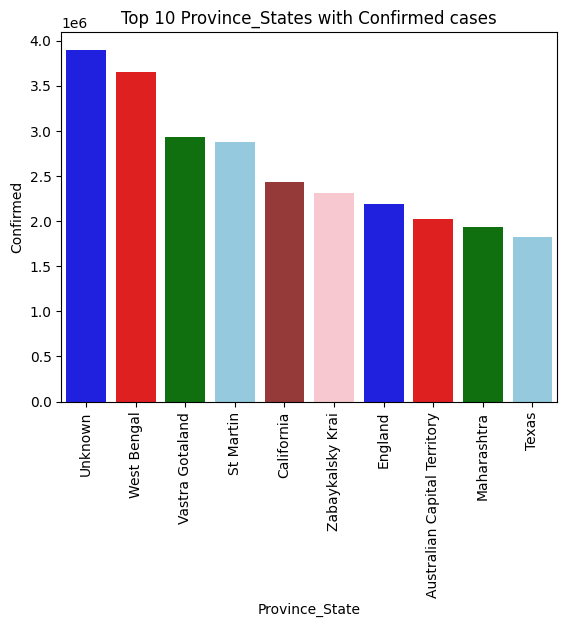

In [44]:
color =['blue','red','green','skyblue','brown','pink']
sns.barplot(x= top_states_df["Province_State"],y= top_states_df["Confirmed"],palette=color)
plt.xticks(rotation='vertical')
plt.title("Top 10 Province_States with Confirmed cases")
plt.show()


Top 10 Province_States with Death cases

In [45]:
top_death_states = df.groupby("Province_State")["Deaths"].sum().sort_values(ascending=False).head(10)
top_death_states

,Deaths
Province_State,
Unknown,106107
West Bengal,105832
England,81593
St Martin,67127
Australian Capital Territory,52788
Maharashtra,49580
Sao Paulo,46775
Zabaykalsky Krai,44614
Lima,42170


In [46]:
top_death_states_df = top_death_states.reset_index()

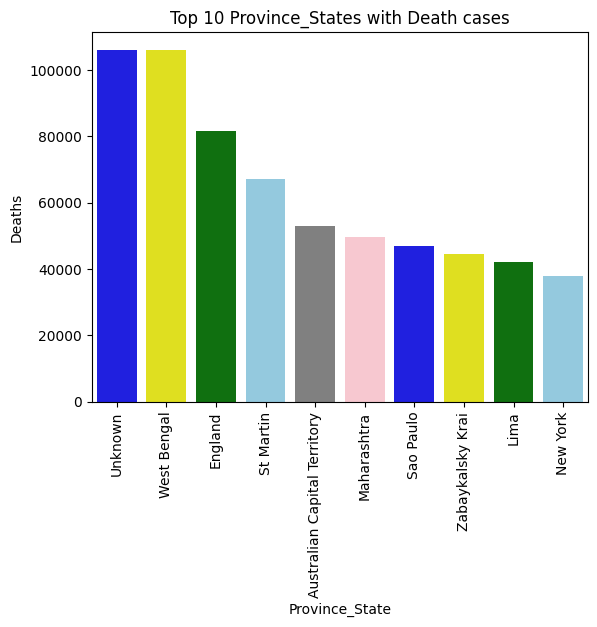

In [47]:
color =['blue','yellow','green','skyblue','grey','pink']
sns.barplot(x= top_death_states_df["Province_State"],y= top_death_states_df["Deaths"],palette=color)
plt.xticks(rotation='vertical')
plt.title("Top 10 Province_States with Death cases")
plt.show()

Top 5 Countries with Confirmed cases

In [48]:
top_con_coun = df.groupby("Country_Region")["Confirmed"].sum().sort_values(ascending=False).head(5)
top_con_coun

,Confirmed
Country_Region,
US,20397401
India,10305788
Brazil,7703971
Russia,3153960
France,2697014


In [49]:
top_con_coun_df = top_con_coun.reset_index()

In [50]:
import plotly.express as px

In [51]:
fig = px.bar(top_con_coun_df,
              x="Country_Region", y="Confirmed",
              title="Top 10 Countries with Confirmed Cases",
              color = "Confirmed",
              labels={'Confirmed': 'Confirmed Cases', 'Country_Region': 'Country'})
fig.show()

Top countries with Deaths

In [52]:
top_death_coun_df = df.groupby('Country_Region')['Deaths'].sum().sort_values(ascending=False).head(5).reset_index()

In [53]:
top_death_coun_df

,Country_Region,Deaths
0,US,352303
1,Brazil,195541
2,India,149218
3,Mexico,126507
4,United Kingdom,95816


In [56]:
fig = px.pie(top_death_coun_df,
                 names="Country_Region",
                 values="Deaths",
                 title="Top 5 countries with Deaths",
                 color = "Deaths"
                 )
fig.show()

Top 5 Countries with Active cases...

In [57]:
top_active_coun=df.groupby("Country_Region")["Active"].sum().sort_values(ascending=False).head(5).reset_index()

In [58]:
top_active_coun

,Country_Region,Active
0,US,19978335
1,United Kingdom,2469220
2,France,2431301
3,Spain,1727052
4,Mexico,1310678


In [59]:
fig = px.bar(
    top_active_coun,
    x='Country_Region',
    y='Active',
    title='Top 5 Countries by Active Cases',
    labels={'Active': 'Active Cases', 'Country_Region': 'Country'},
    color='Active'
)
fig.show()

Display only two decimal places

In [60]:
df["Incident_Rate"] = df["Incident_Rate"].round(2)

Top 5 countries by Incident Rate

In [61]:
top_coun_inci = df.groupby("Country_Region")["Incident_Rate"].sum().sort_values(ascending=False).head(5).reset_index()

In [ ]:
top_coun_inci

,Country_Region,Incident_Rate
0,US,21338766.80
1,Russia,185745.21
2,Brazil,127566.58
3,Colombia,91939.67
4,Sweden,80308.92


In [62]:
fig = px.pie(
    top_coun_inci,
    names='Country_Region',
    values="Incident_Rate",
    title = "Top 5 countries by Incident Rate",
    color ='Country_Region'
)
fig.show()

Display only two decimal places in Case_Fatility_Ratio

In [63]:
df["Case_Fatality_Ratio"] = df["Case_Fatality_Ratio"].round(2)

In [64]:
df["Recovery_Rate"] = df["Recovery_Rate"].round(2)

Top countries by recovery-rate...

In [65]:
top_rec_coun = df.groupby("Country_Region")["Recovery_Rate"].sum().sort_values(ascending=False).head(5).reset_index()

In [ ]:
top_rec_coun

,Country_Region,Recovery_Rate
0,Russia,7012.68
1,Japan,3867.15
2,India,3365.18
3,China,3198.99
4,Colombia,3071.34


In [66]:
fig = px.pie(
    top_rec_coun,
    names='Country_Region',
    values="Recovery_Rate",
    title = "Top 5 countries by Recovery Rate",
    color ='Country_Region'
)
fig.show()

Top countries by Case_Fatality_Ratio...

In [67]:
top_cfr_count = df.groupby("Country_Region")["Case_Fatality_Ratio"].sum().sort_values(ascending=False).head(5).reset_index()

In [68]:
top_cfr_count

,Country_Region,Case_Fatality_Ratio
0,US,6953.50
1,Mexico,325.35
2,Peru,195.26
3,Belgium,182.98
4,Russia,133.63


In [69]:
fig = px.pie(
    top_cfr_count,
    names='Country_Region',
    values="Case_Fatality_Ratio",
    title = "Top 5 countries by Case_Fatality_Ratio",
    color ='Country_Region'
)
fig.show()

Top Province states with closed cases...

In [70]:
top_closed_state = df.groupby("Province_State")["Closed_cases"].sum().sort_values(ascending=False).head(5).reset_index()

In [71]:
top_closed_state

,Province_State,Closed_cases
0,Unknown,3218243
1,West Bengal,3192795
2,Vastra Gotaland,2607604
3,Maharashtra,1878126
4,Australian Capital Territory,1784446


In [73]:
fig = px.scatter(
    top_closed_state,
    x='Province_State',
    y='Closed_cases',
    size="Closed_cases",
    color="Closed_cases" ,
    title='Top states by closed cases'

)
fig.show()

Data distribution along the Latitude_Region...

In [74]:
df["Latitude_Region"].value_counts()

,count
Latitude_Region,
North,3377
Equator,418
South,94
Far North,44
Far South,23


Data distribution along the Longitude_Region

In [75]:
df["Longitude_Region"].value_counts()

,count
Longitude_Region,
West,1841
Far West,1643
East,321
Far East,151


Recovery_Rate in Latitude regions

In [76]:
lat_recv_rate = df.groupby("Latitude_Region")["Recovery_Rate"].sum().sort_values(ascending=False).reset_index()

In [77]:
lat_recv_rate

,Latitude_Region,Recovery_Rate
0,North,23134.59
1,Equator,15953.93
2,South,5790.16
3,Far South,1996.12
4,Far North,1806.03


In [79]:
fig = px.line(lat_recv_rate,
                x= "Latitude_Region",
                 y="Recovery_Rate",
                 title="Recovery_Rate in Latitude region"
                 )
fig.show()

# END of the project